In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt

In [2]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/Epithelial/")

In [3]:
## read data
adata = sc.read_h5ad("./Epithelial.bySample.n10.bbknn_umap_leiden_marker.res0.3.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

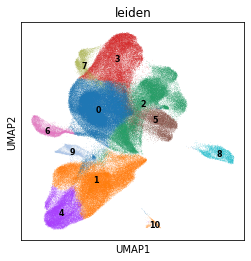

In [4]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

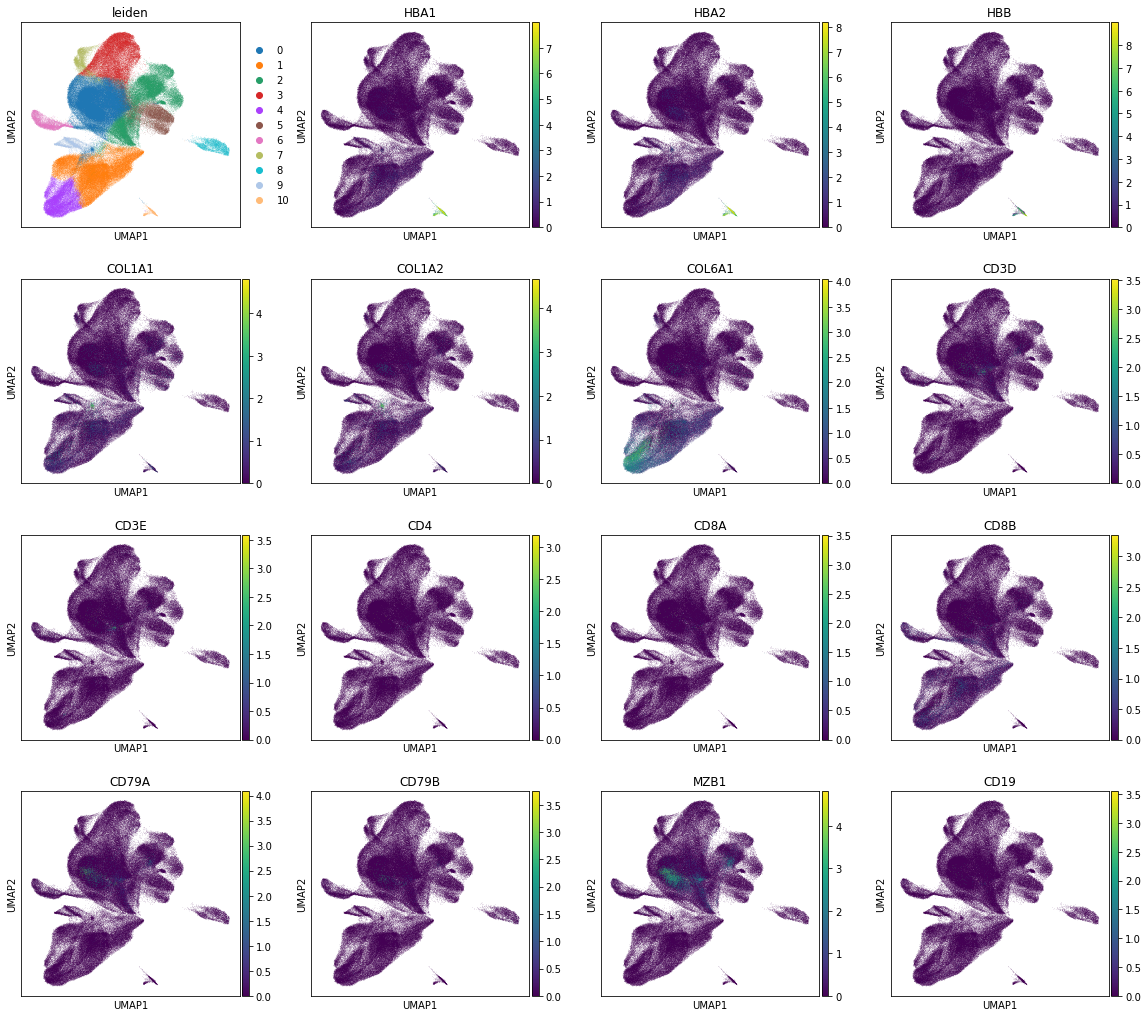

In [5]:
## plot gene expression in umap
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=['leiden',"HBA1","HBA2","HBB","COL1A1","COL1A2","COL6A1","CD3D","CD3E","CD4","CD8A","CD8B","CD79A","CD79B","MZB1","CD19"])

In [6]:
cells = adata.obs[ adata.obs.leiden != '10' ].index.to_list()

In [7]:
tmp = sc.read_h5ad("../ibd_20220111.raw.h5ad")
adata = tmp[tmp.obs.index.isin(cells)]

In [8]:
## RBC signature
HBA1 = adata[:,"HBA1"].X.toarray()
HBA2 = adata[:,"HBA2"].X.toarray()
HBB = adata[:,"HBB"].X.toarray()

## T signature
CD3D = adata[:,"CD3D"].X.toarray()
CD3E = adata[:,"CD3E"].X.toarray()
CD8A = adata[:,"CD8A"].X.toarray()
CD8B = adata[:,"CD8B"].X.toarray()

## B signature
CD79A = adata[:,"CD79A"].X.toarray()
CD79B = adata[:,"CD79B"].X.toarray()
MZB1 = adata[:,"MZB1"].X.toarray()

## fibroblast signature
COL1A1 = adata[:,"COL1A1"].X.toarray()
COL1A2 = adata[:,"COL1A2"].X.toarray()

In [9]:
total = np.array(adata.X.sum(axis=1))

## RBC signature
HBA1_exp = np.log2( HBA1*10000/total + 1)
HBA2_exp = np.log2( HBA2*10000/total + 1)
HBB_exp = np.log2( HBB*10000/total + 1)
RBC_exp = (HBA1_exp + HBA2_exp  + HBB_exp)/3

## T signature
CD3D_exp = np.log2( CD3D*10000/total + 1)
CD3E_exp = np.log2( CD3E*10000/total + 1)
CD8A_exp = np.log2( CD8A*10000/total + 1)
CD8B_exp = np.log2( CD8B*10000/total + 1)
T_exp = (CD8A_exp + CD8B_exp + CD3D_exp + CD3E_exp)/4

## B signature
CD79A_exp = np.log2( CD79A*10000/total + 1)
CD79B_exp = np.log2( CD79B*10000/total + 1)
MZB1_exp = np.log2( MZB1*10000/total + 1)
B_exp = (CD79A_exp + CD79B_exp + MZB1_exp)/3

## fibroblast signature
COL1A1_exp = np.log2( COL1A1*10000/total + 1)
COL1A2_exp = np.log2( COL1A2*10000/total + 1)
fib_exp = (COL1A1_exp + COL1A2_exp)/2

In [10]:
select = np.logical_and(RBC_exp < 0.1, T_exp < 0.1)
select = np.logical_and(select, B_exp < 0.1)
elect = np.logical_and(select, fib_exp < 0.1)
print(np.sum(select)/len(select))

0.8384997152387926


In [11]:
adata = adata[select]

In [12]:
adata.write_h5ad("Epithelial.bySample.n10.filtered.h5ad")

In [13]:
## done